# Day 7 - Expected Shortfall (CVaR)

## Learning Objectives
- Understand the concept of Expected Shortfall (Conditional VaR or CVaR).
- Learn the limitation of VaR and why CVaR is a more coherent risk measure.
- Calculate CVaR using historical returns for a single stock (AAPL).

## Key Concepts
- CVaR (Expected Shortfall) is the average of losses beyond the VaR threshold.
- Unlike VaR, CVaR accounts for the tail of the loss distribution.
- Used in risk management, portfolio optimization, and stress testing.

In [2]:
# Step 1: Load AAPL data from yfinance
import yfinance as yf
import pandas as pd

ticker = "AAPL"
df = yf.download(ticker, start="2018-01-01", progress=False)
df['Return'] = df['Close'].pct_change()
df.dropna(inplace=True)
df.tail()

C:\Users\vedik\AppData\Local\Temp\ipykernel_23680\3210532547.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2018-01-01", progress=False)


Price,Close,High,Low,Open,Volume,Return
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2025-07-28,214.050003,214.850006,213.059998,214.029999,37858000,0.000795
2025-07-29,211.270004,214.809998,210.820007,214.179993,51411700,-0.012988
2025-07-30,209.050003,212.389999,207.720001,211.899994,45512500,-0.010508
2025-07-31,207.570007,209.839996,207.160004,208.490005,78744400,-0.007080
2025-08-01,203.070007,213.580002,201.500000,210.889999,73752581,-0.021679


In [3]:
# Step 2: Calculate Historical VaR and CVaR (Expected Shortfall)
import numpy as np

confidence_level = 0.95
portfolio_value = 1_000_000  # Assume $1,000,000 investment

# Historical VaR
var_threshold = df['Return'].quantile(1 - confidence_level)

# CVaR: Average of returns less than VaR threshold
cvar = df[df['Return'] <= var_threshold]['Return'].mean()

# Scale to portfolio value
var_dollar = abs(var_threshold * portfolio_value)
cvar_dollar = abs(cvar * portfolio_value)

print(f"Historical VaR (95%): ${var_dollar:,.2f}")
print(f"Expected Shortfall (CVaR 95%): ${cvar_dollar:,.2f}")

Historical VaR (95%): $30,029.19
Expected Shortfall (CVaR 95%): $44,644.71


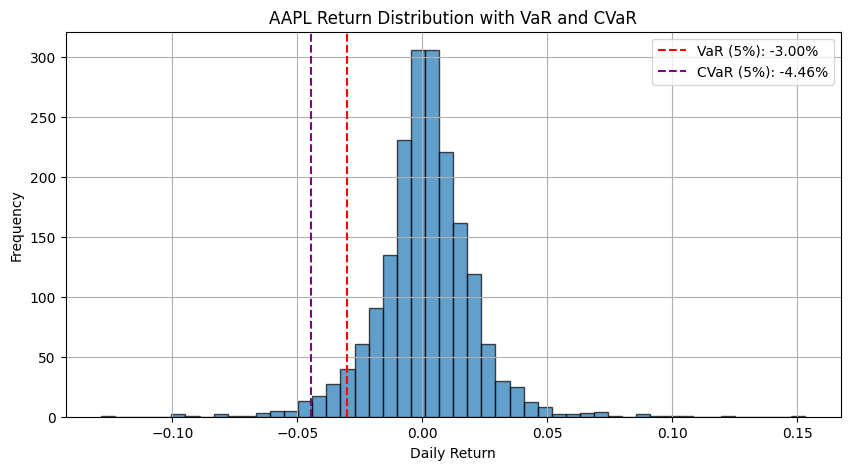

In [4]:
# Step 3: Visualize the tail and CVaR
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df['Return'], bins=50, alpha=0.7, edgecolor='black')
plt.axvline(var_threshold, color='red', linestyle='--', label=f'VaR (5%): {var_threshold:.2%}')
plt.axvline(cvar, color='purple', linestyle='--', label=f'CVaR (5%): {cvar:.2%}')
plt.title('AAPL Return Distribution with VaR and CVaR')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()